In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import scipy.stats as st
import pylab

In [2]:
df=pd.read_csv('D:/Data/Datasets/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df['Age']=2022-df['Year']
df.drop(columns=['Year'],inplace=True)

In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [11]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

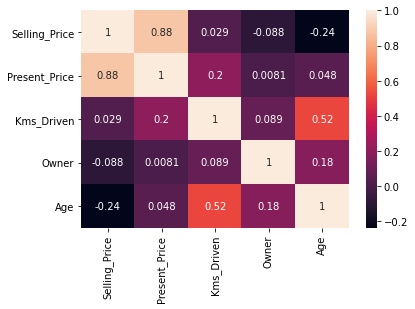

In [12]:
sns.heatmap(df.corr(),annot=True);

In [13]:
df.drop(columns=['Car_Name'],inplace=True)

### One Hot Encoding

In [14]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


### Feature Selection

In [16]:
Y=df['Selling_Price']
X=df.drop(columns=['Selling_Price'])

In [17]:
df.skew(axis=0)

Selling_Price              2.493422
Present_Price              4.083150
Kms_Driven                 6.436013
Owner                      7.616850
Age                        1.246189
Fuel_Type_CNG             12.206146
Fuel_Type_Diesel           1.512750
Fuel_Type_Petrol          -1.461340
Seller_Type_Dealer        -0.622146
Seller_Type_Individual     0.622146
Transmission_Automatic     2.173776
Transmission_Manual       -2.173776
dtype: float64

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

In [20]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
regression.score(X_train,Y_train)

0.881772093848094

In [22]:
regression.score(X_test,Y_test)

0.8678405683619823

In [23]:
def adj_r2(X,Y):
    r2=regression.score(X,Y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
adj_r2(X_train,Y_train)

0.8760681159197126

In [25]:
adj_r2(X_test,Y_test)

0.8381721245248763

In [26]:
y_pred=regression.predict(X_test)

In [27]:
mean_squared_error(Y_test,y_pred)

2.8670907621903345

In [29]:
rmse=0.5*mean_squared_error(Y_test,y_pred)
rmse

1.4335453810951673

In [30]:
 mean_absolute_error(Y_test, y_pred)

1.094445664702869

In [31]:
mean_absolute_percentage_error(Y_test, y_pred)

1.2408174249624093

### Checking Regularization

In [32]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100, normalize = True)
lasscv.fit(X_train, Y_train)

C:\Users\harme\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100, normalize=True)

In [33]:
alpha = lasscv.alpha_
alpha

0.0033749591682577644

In [34]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.0033749591682577644)

In [35]:
lasso_reg.score(X_test, Y_test)

0.8637452257774441

In [38]:
variables = X_scaled
Vif =pd.DataFrame()
Vif['Vif'] = [vif(variables,i) for i in range(variables.shape[1])]
Vif['Features'] = X.columns

In [39]:
Vif

,Vif,Features
0,1.836927,Present_Price
1,1.517916,Kms_Driven
2,1.056734,Owner
3,1.482347,Age
4,inf,Fuel_Type_CNG
5,inf,Fuel_Type_Diesel
6,inf,Fuel_Type_Petrol
7,inf,Seller_Type_Dealer
8,inf,Seller_Type_Individual
9,inf,Transmission_Automatic
